<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

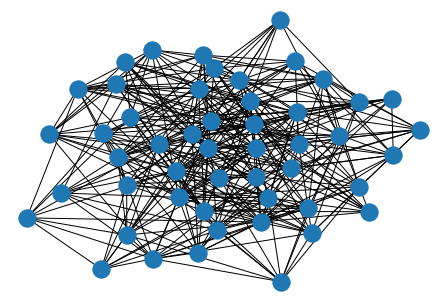

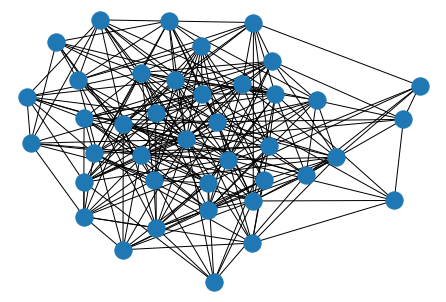

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 1 ... 0 1 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][4]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][4]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][6]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][6]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][2]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][2]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][4]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][6]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][2]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9821, 9666, 9411, 9087, 8621, 8078, 7465, 6806, 6145, 5570, 5110, 4847, 4302, 3665, 3083, 2590, 2102, 1775, 1548, 1409, 1318, 1230, 1179, 1149, 1128, 1106, 1088, 1080, 1079, 1076, 1074, 1073, 1073, 1073, 1073, 1073]
[179, 334, 589, 913, 1200, 1588, 1946, 2281, 2476, 2508, 2355, 1959, 1843, 1905, 2027, 2257, 2200, 1890, 1535, 1181, 784, 545, 369, 260, 190, 124, 91, 69, 49, 30, 14, 7, 6, 3, 1, 0]
[0, 0, 0, 0, 179, 334, 589, 913, 1379, 1922, 2535, 3194, 3855, 4430, 4890, 5153, 5698, 6335, 6917, 7410, 7898, 8225, 8452, 8591, 8682, 8770, 8821, 8851, 8872, 8894, 8912, 8920, 8921, 8924, 8926, 8927]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9821, 9666, 9411, 9087, 8621, 8078, 7465, 6806, 6145, 5570, 5110, 4847, 4302, 3665, 3083, 2590, 2102, 1775, 1548, 1409, 1318, 1230, 1179, 1149, 1128, 1106, 1088, 1080, 1079, 1076, 1074, 1073, 1073, 1073, 1073, 107

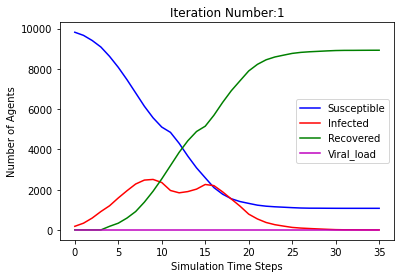

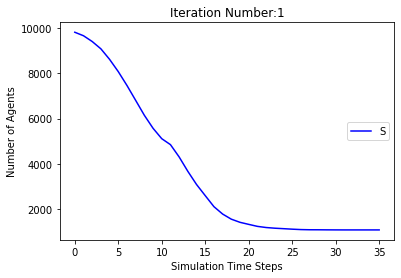

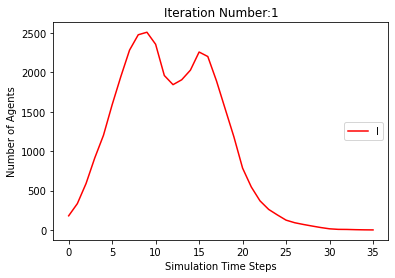

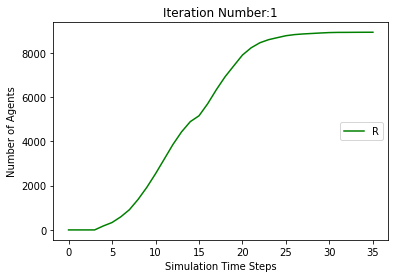

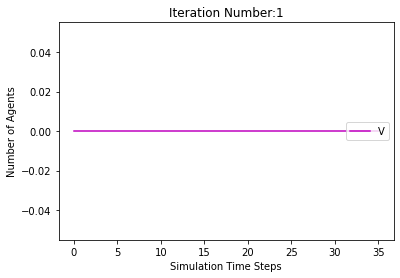

[9821, 9629, 9364, 9037, 8549, 8073, 7545, 7033, 6522, 6083, 5719, 5487, 4925, 4324, 3706, 3174, 2729, 2371, 2127, 1954, 1846, 1758, 1680, 1635, 1623, 1594, 1577, 1559, 1557, 1554, 1551, 1549, 1548, 1547, 1545, 1545, 1545, 1544, 1541, 1541, 1541, 1540, 1540, 1540, 1539, 1539, 1539, 1539, 1539]
[179, 371, 636, 963, 1272, 1556, 1819, 2004, 2027, 1990, 1826, 1546, 1597, 1759, 2013, 2313, 2196, 1953, 1579, 1220, 883, 613, 447, 319, 223, 164, 103, 76, 66, 40, 26, 10, 9, 7, 6, 4, 3, 3, 4, 4, 4, 4, 1, 1, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 179, 371, 636, 963, 1451, 1927, 2455, 2967, 3478, 3917, 4281, 4513, 5075, 5676, 6294, 6826, 7271, 7629, 7873, 8046, 8154, 8242, 8320, 8365, 8377, 8406, 8423, 8441, 8443, 8446, 8449, 8451, 8452, 8453, 8455, 8455, 8455, 8456, 8459, 8459, 8459, 8460, 8460, 8460, 8461]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

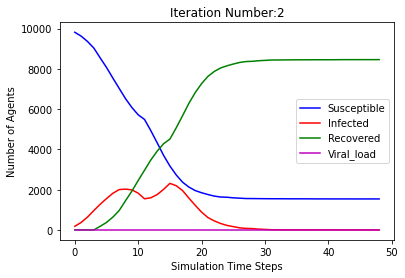

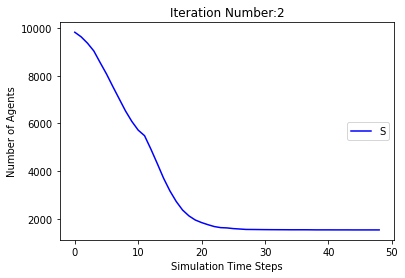

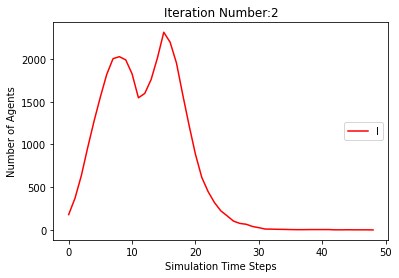

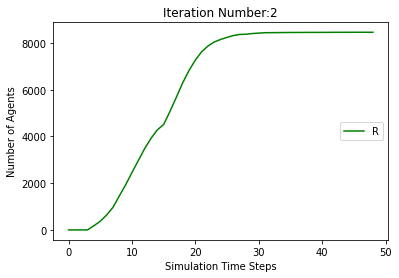

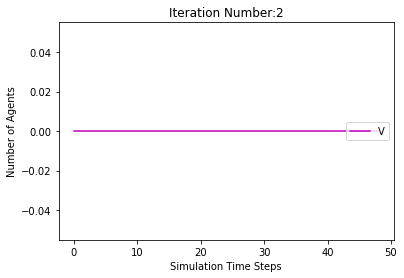

[9821, 9641, 9415, 9064, 8593, 8081, 7499, 6872, 6191, 5568, 5073, 4760, 4354, 3914, 3547, 3149, 2790, 2515, 2327, 2180, 2084, 2010, 1928, 1880, 1843, 1822, 1801, 1783, 1766, 1759, 1749, 1744, 1744, 1743, 1742, 1742, 1742, 1742, 1742]
[179, 359, 585, 936, 1228, 1560, 1916, 2192, 2402, 2513, 2426, 2112, 1837, 1654, 1526, 1611, 1564, 1399, 1220, 969, 706, 505, 399, 300, 241, 188, 127, 97, 77, 63, 52, 39, 22, 16, 7, 2, 2, 1, 0]
[0, 0, 0, 0, 179, 359, 585, 936, 1407, 1919, 2501, 3128, 3809, 4432, 4927, 5240, 5646, 6086, 6453, 6851, 7210, 7485, 7673, 7820, 7916, 7990, 8072, 8120, 8157, 8178, 8199, 8217, 8234, 8241, 8251, 8256, 8256, 8257, 8258]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9821, 9666, 9411, 9087, 8621, 8078, 7465, 6806, 6145, 5570, 5110, 4847, 4302, 3665, 3083, 2590, 2102, 1775, 1548, 1409, 1318, 1230, 1179, 1149, 1128, 

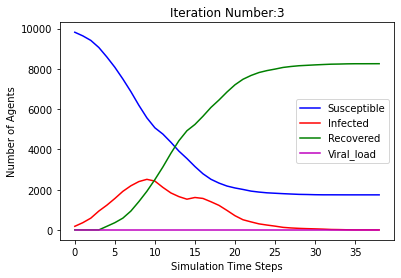

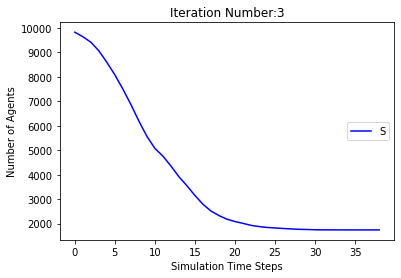

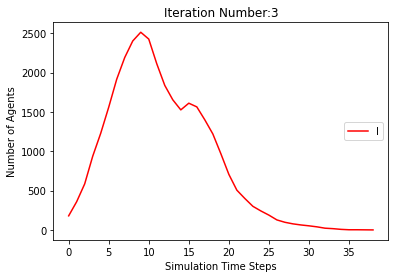

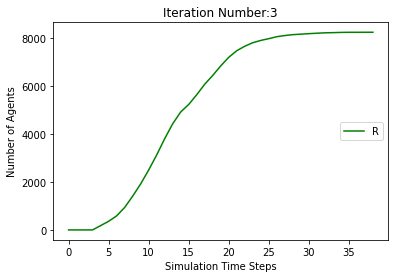

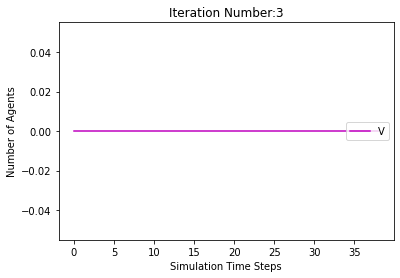

[9821, 9640, 9407, 9057, 8578, 7963, 7295, 6636, 5950, 5367, 4947, 4675, 4181, 3521, 2932, 2346, 1809, 1436, 1231, 1074, 957, 884, 848, 824, 807, 802, 800, 798, 798, 797, 796, 796, 796, 796, 796]
[179, 360, 593, 943, 1243, 1677, 2112, 2421, 2628, 2596, 2348, 1961, 1769, 1846, 2015, 2329, 2372, 2085, 1701, 1272, 852, 552, 383, 250, 150, 82, 48, 26, 9, 5, 4, 2, 2, 1, 0]
[0, 0, 0, 0, 179, 360, 593, 943, 1422, 2037, 2705, 3364, 4050, 4633, 5053, 5325, 5819, 6479, 7068, 7654, 8191, 8564, 8769, 8926, 9043, 9116, 9152, 9176, 9193, 9198, 9200, 9202, 9202, 9203, 9204]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9821, 9666, 9411, 9087, 8621, 8078, 7465, 6806, 6145, 5570, 5110, 4847, 4302, 3665, 3083, 2590, 2102, 1775, 1548, 1409, 1318, 1230, 1179, 1149, 1128, 1106, 1088, 1080, 1079, 1076, 1074, 1073, 1073, 1073, 1073, 1073], [9821, 9629, 9364, 9037, 8549, 8073

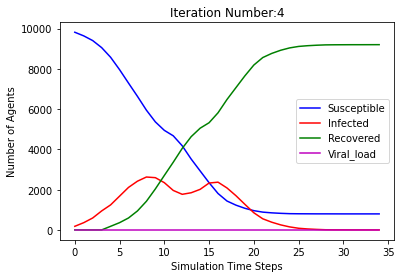

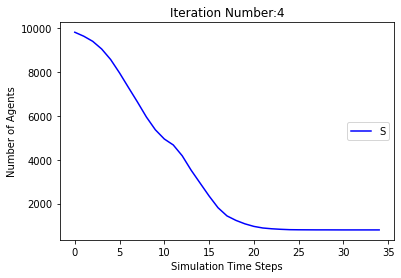

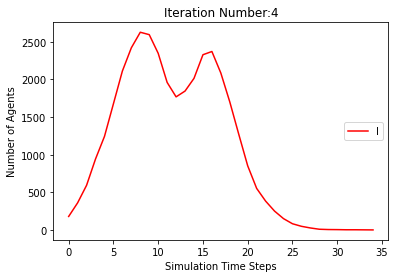

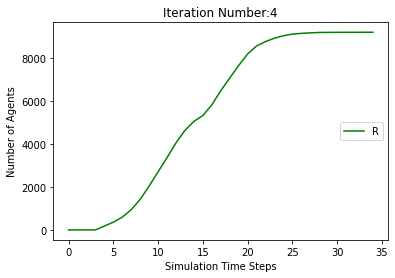

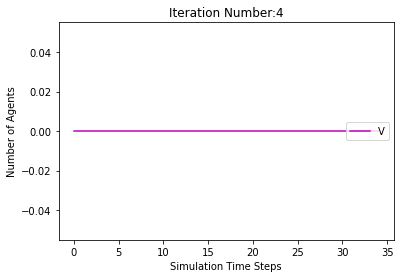

[9821, 9646, 9379, 9048, 8566, 7972, 7317, 6592, 5883, 5276, 4844, 4619, 4496, 4305, 4057, 3831, 3644, 3456, 3265, 3117, 2979, 2885, 2824, 2757, 2703, 2677, 2625, 2571, 2532, 2502, 2484, 2467, 2459, 2452, 2446, 2441, 2439, 2439, 2433, 2430, 2428, 2428, 2428, 2428, 2428]
[179, 354, 621, 952, 1255, 1674, 2062, 2456, 2683, 2696, 2473, 1973, 1387, 971, 787, 788, 852, 849, 792, 714, 665, 571, 441, 360, 276, 208, 199, 186, 171, 175, 141, 104, 73, 50, 38, 26, 20, 13, 13, 11, 11, 11, 5, 2, 0]
[0, 0, 0, 0, 179, 354, 621, 952, 1434, 2028, 2683, 3408, 4117, 4724, 5156, 5381, 5504, 5695, 5943, 6169, 6356, 6544, 6735, 6883, 7021, 7115, 7176, 7243, 7297, 7323, 7375, 7429, 7468, 7498, 7516, 7533, 7541, 7548, 7554, 7559, 7561, 7561, 7567, 7570, 7572]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9821, 9666, 9411, 9087,

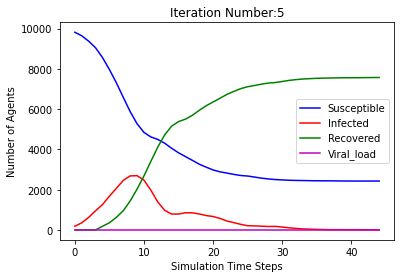

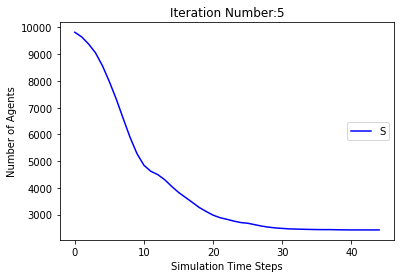

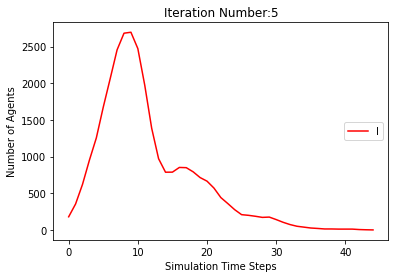

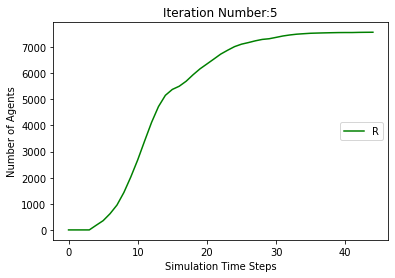

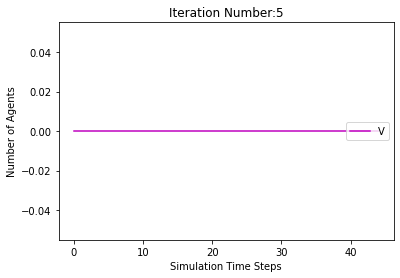

[9821, 9650, 9410, 9066, 8618, 8135, 7582, 7037, 6517, 6055, 5663, 5404, 5241, 4981, 4623, 4278, 3895, 3494, 3095, 2772, 2526, 2308, 2147, 2029, 1952, 1869, 1808, 1749, 1708, 1681, 1654, 1631, 1612, 1603, 1590, 1581, 1577, 1567, 1564, 1559, 1559, 1556, 1554, 1554, 1554, 1554, 1554]
[179, 350, 590, 934, 1203, 1515, 1828, 2029, 2101, 2080, 1919, 1633, 1276, 1074, 1040, 1126, 1346, 1487, 1528, 1506, 1369, 1186, 948, 743, 574, 439, 339, 280, 244, 188, 154, 118, 96, 78, 64, 50, 35, 36, 26, 22, 18, 11, 10, 5, 5, 2, 0]
[0, 0, 0, 0, 179, 350, 590, 934, 1382, 1865, 2418, 2963, 3483, 3945, 4337, 4596, 4759, 5019, 5377, 5722, 6105, 6506, 6905, 7228, 7474, 7692, 7853, 7971, 8048, 8131, 8192, 8251, 8292, 8319, 8346, 8369, 8388, 8397, 8410, 8419, 8423, 8433, 8436, 8441, 8441, 8444, 8446]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

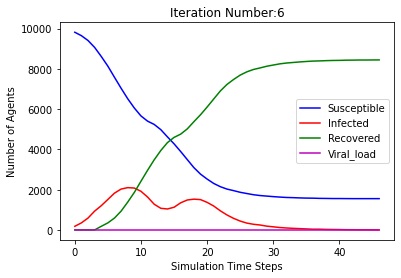

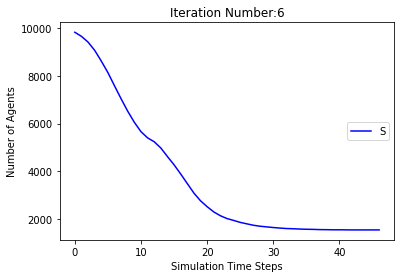

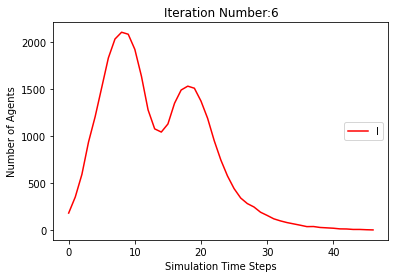

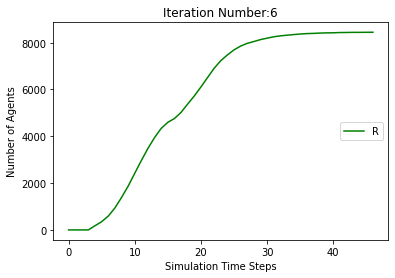

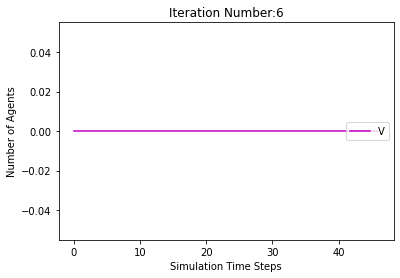

[9821, 9658, 9432, 9108, 8683, 8154, 7508, 6800, 6135, 5536, 5091, 4764, 4337, 3866, 3371, 2887, 2468, 2117, 1842, 1668, 1510, 1395, 1329, 1265, 1219, 1190, 1177, 1162, 1152, 1147, 1142, 1140, 1140, 1139, 1137, 1136, 1136, 1136, 1136, 1136]
[179, 342, 568, 892, 1138, 1504, 1924, 2308, 2548, 2618, 2417, 2036, 1798, 1670, 1720, 1877, 1869, 1749, 1529, 1219, 958, 722, 513, 403, 291, 205, 152, 103, 67, 43, 35, 22, 12, 8, 5, 4, 4, 3, 1, 0]
[0, 0, 0, 0, 179, 342, 568, 892, 1317, 1846, 2492, 3200, 3865, 4464, 4909, 5236, 5663, 6134, 6629, 7113, 7532, 7883, 8158, 8332, 8490, 8605, 8671, 8735, 8781, 8810, 8823, 8838, 8848, 8853, 8858, 8860, 8860, 8861, 8863, 8864]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9821, 9666, 9411, 9087, 8621, 8078, 7465, 6806, 6145, 5570, 5110, 4847, 4302, 3665, 3083, 2590, 2102, 1775, 1548, 1409, 1318, 123

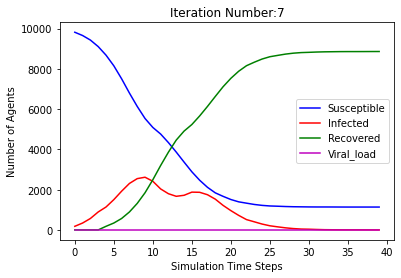

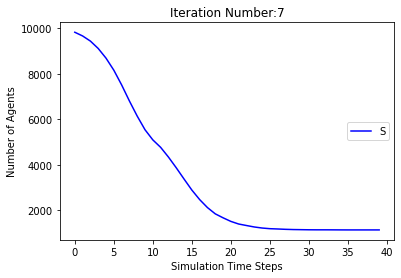

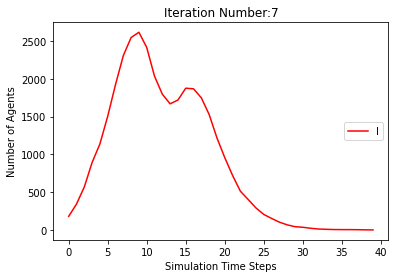

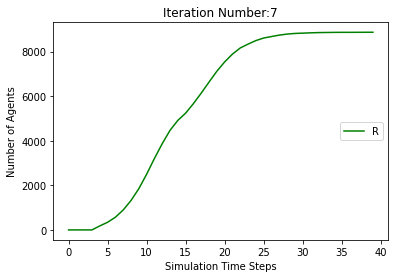

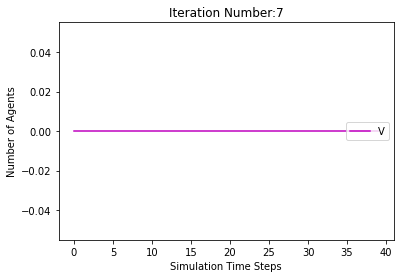

[9821, 9652, 9430, 9116, 8682, 8140, 7523, 6823, 6132, 5501, 4999, 4679, 4105, 3333, 2644, 2086, 1601, 1311, 1081, 955, 871, 817, 786, 757, 743, 736, 734, 729, 729, 726, 723, 722, 721, 720, 720, 720, 720, 720]
[179, 348, 570, 884, 1139, 1512, 1907, 2293, 2550, 2639, 2524, 2144, 2027, 2168, 2355, 2593, 2504, 2022, 1563, 1131, 730, 494, 295, 198, 128, 81, 52, 28, 14, 10, 11, 7, 8, 6, 3, 2, 1, 0]
[0, 0, 0, 0, 179, 348, 570, 884, 1318, 1860, 2477, 3177, 3868, 4499, 5001, 5321, 5895, 6667, 7356, 7914, 8399, 8689, 8919, 9045, 9129, 9183, 9214, 9243, 9257, 9264, 9266, 9271, 9271, 9274, 9277, 9278, 9279, 9280]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9821, 9666, 9411, 9087, 8621, 8078, 7465, 6806, 6145, 5570, 5110, 4847, 4302, 3665, 3083, 2590, 2102, 1775, 1548, 1409, 1318, 1230, 1179, 1149, 1128, 1106, 1088, 1080, 1079, 1076, 1074, 1073, 1

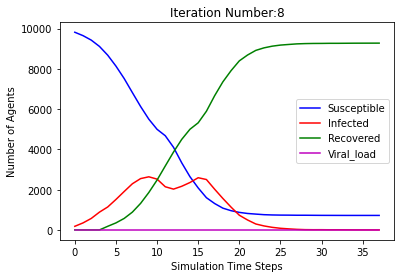

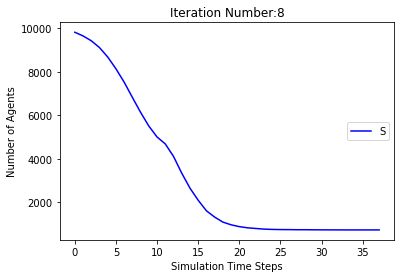

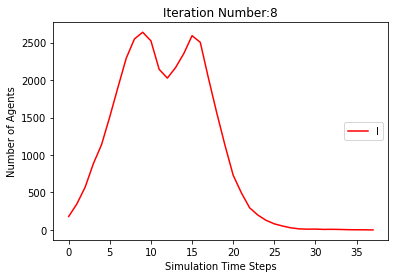

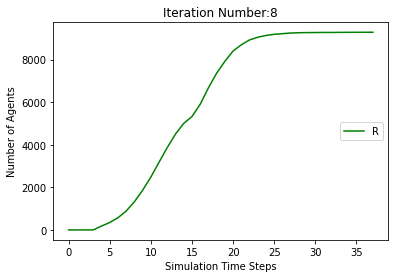

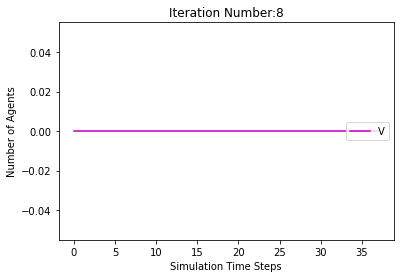

[9821, 9643, 9393, 9041, 8575, 8037, 7373, 6655, 5945, 5355, 4918, 4636, 4321, 3757, 3209, 2714, 2254, 1875, 1606, 1373, 1187, 1060, 989, 943, 906, 882, 869, 855, 847, 841, 838, 837, 835, 835, 835, 834, 833, 832, 832, 831, 831, 831, 831, 831]
[179, 357, 607, 959, 1246, 1606, 2020, 2386, 2630, 2682, 2455, 2019, 1624, 1598, 1709, 1922, 2067, 1882, 1603, 1341, 1067, 815, 617, 430, 281, 178, 120, 88, 59, 41, 31, 18, 12, 6, 3, 3, 2, 3, 3, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 179, 357, 607, 959, 1425, 1963, 2627, 3345, 4055, 4645, 5082, 5364, 5679, 6243, 6791, 7286, 7746, 8125, 8394, 8627, 8813, 8940, 9011, 9057, 9094, 9118, 9131, 9145, 9153, 9159, 9162, 9163, 9165, 9165, 9165, 9166, 9167, 9168, 9168, 9169]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9821, 9666, 9411, 9087, 8621, 8078, 7465, 6806, 6145, 5570, 5110, 4847,

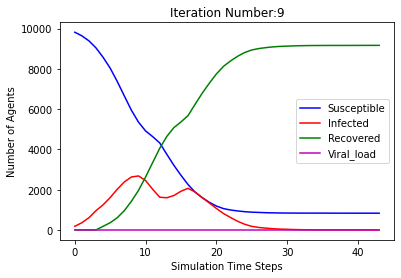

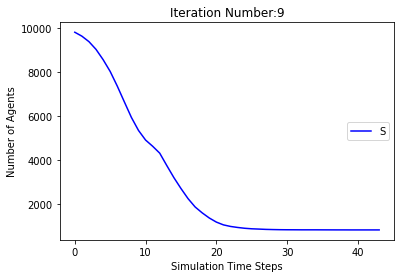

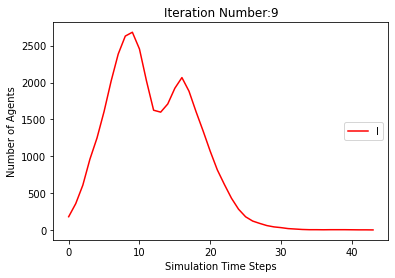

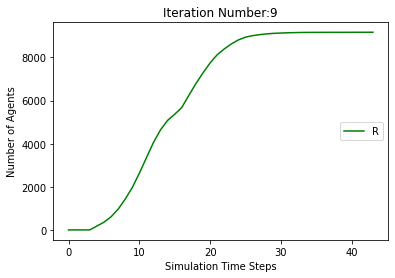

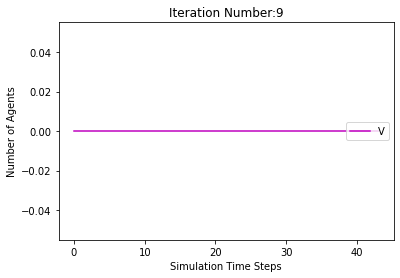

[9821, 9645, 9387, 9022, 8464, 7807, 7114, 6447, 5783, 5228, 4819, 4357, 3726, 3065, 2475, 1968, 1633, 1430, 1297, 1215, 1171, 1132, 1100, 1086, 1077, 1069, 1066, 1065, 1064, 1063, 1063, 1063, 1063, 1063]
[179, 355, 613, 978, 1357, 1838, 2273, 2575, 2681, 2579, 2295, 2090, 2057, 2163, 2344, 2389, 2093, 1635, 1178, 753, 462, 298, 197, 129, 94, 63, 34, 21, 13, 6, 3, 2, 1, 0]
[0, 0, 0, 0, 179, 355, 613, 978, 1536, 2193, 2886, 3553, 4217, 4772, 5181, 5643, 6274, 6935, 7525, 8032, 8367, 8570, 8703, 8785, 8829, 8868, 8900, 8914, 8923, 8931, 8934, 8935, 8936, 8937]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9821, 9666, 9411, 9087, 8621, 8078, 7465, 6806, 6145, 5570, 5110, 4847, 4302, 3665, 3083, 2590, 2102, 1775, 1548, 1409, 1318, 1230, 1179, 1149, 1128, 1106, 1088, 1080, 1079, 1076, 1074, 1073, 1073, 1073, 1073, 1073], [9821, 9629, 9364, 9037, 8549, 8073, 7545

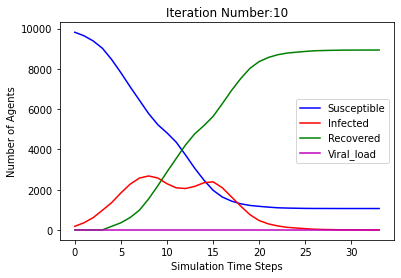

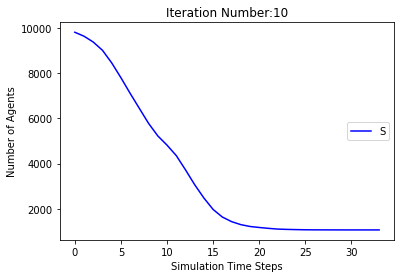

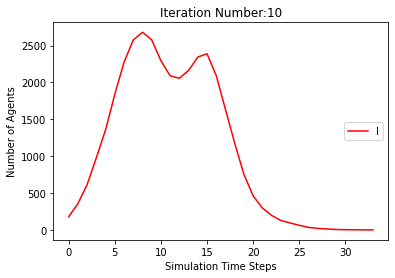

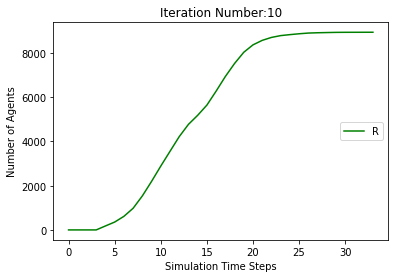

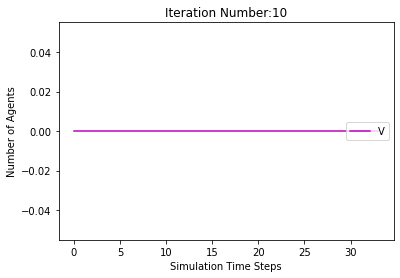

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj > 0.01 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

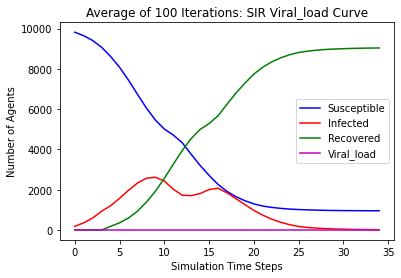

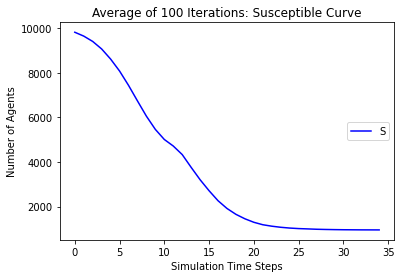

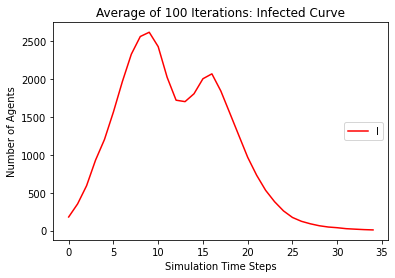

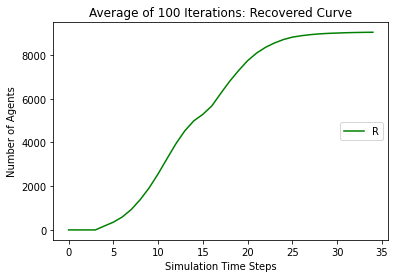

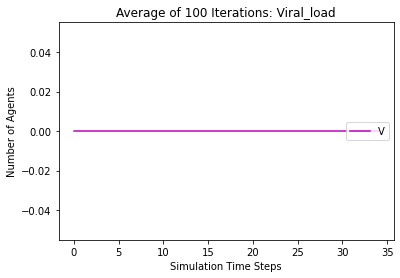

In [11]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Viral_load Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Viral_load')
plt.ylabel('Number of Agents')
plt.legend(("Viral_load"),loc='center right')
plt.show()  


  
